Initial Data Preview:
    id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           

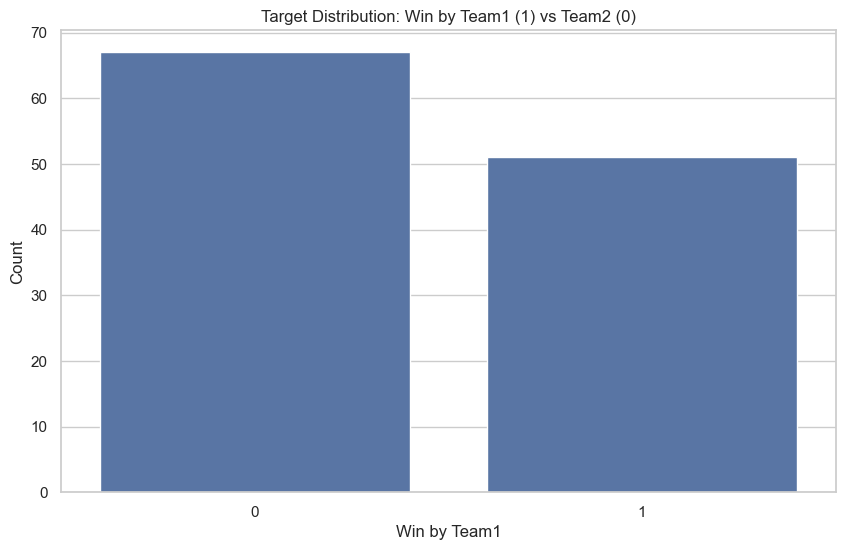

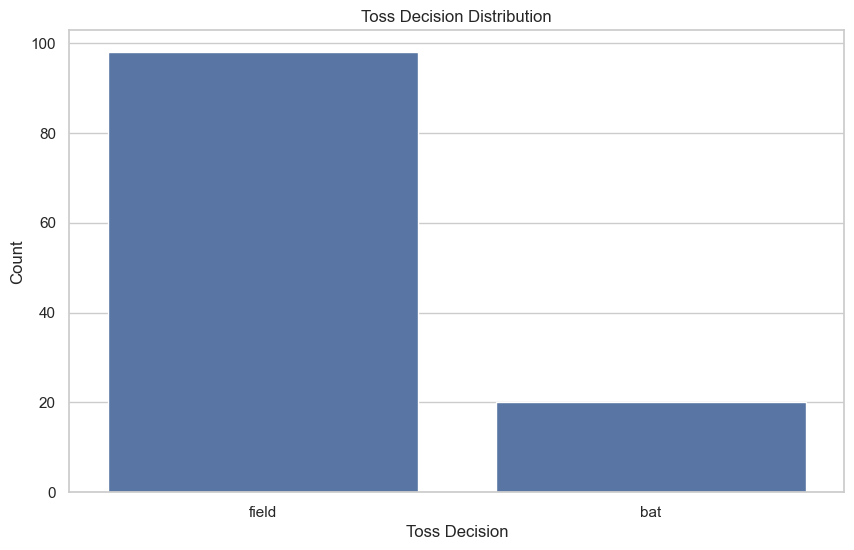

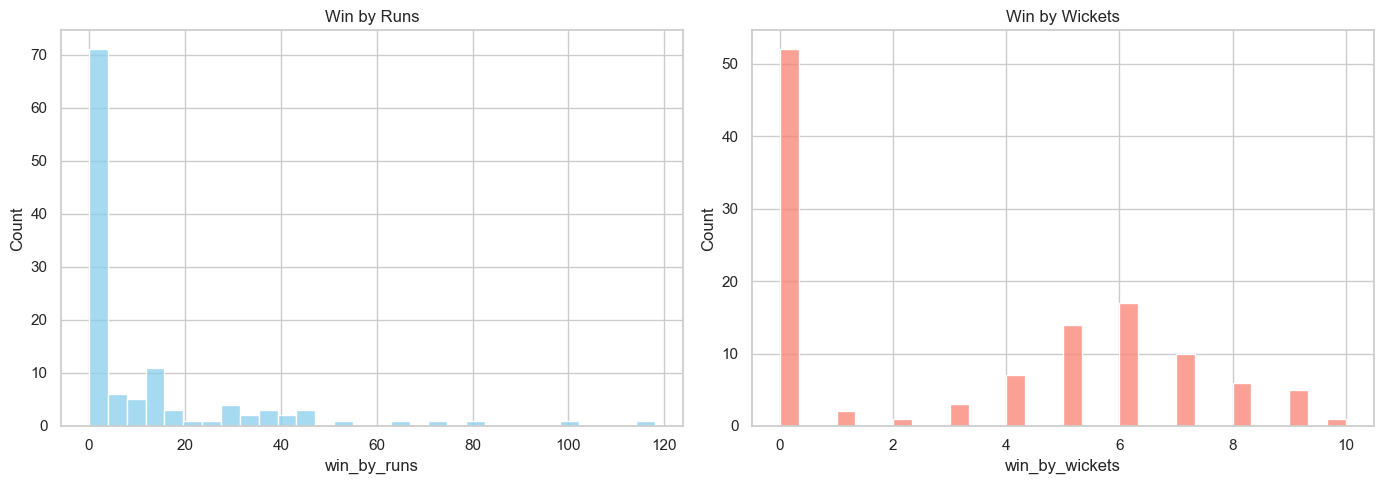

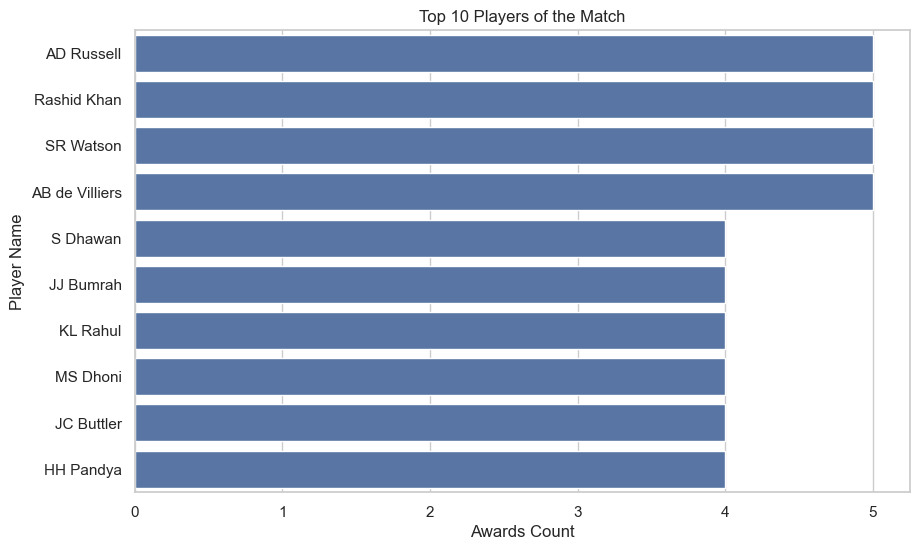


Model Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.93      0.97      0.95        24
weighted avg       0.96      0.96      0.96        24



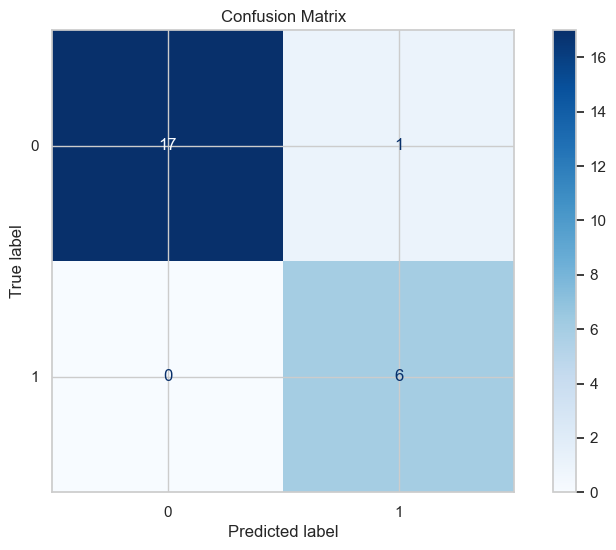

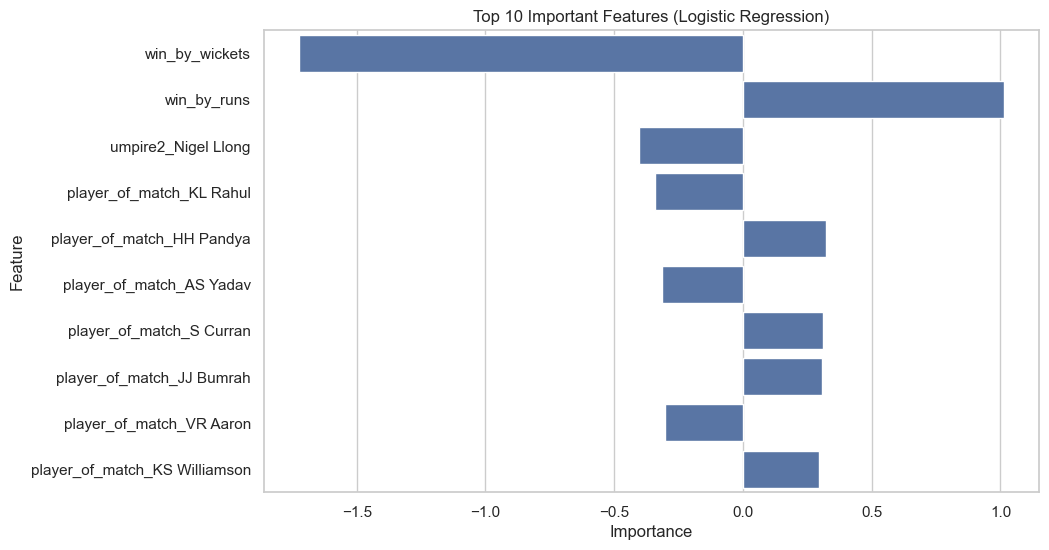

In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Optional: Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 2: Load Dataset
df = pd.read_csv("D:\\matches.csv")  # Replace with your file path
print("Initial Data Preview:\n", df.head())
print("\nInfo:\n", df.info())

# Step 3: Data Cleaning
df = df.dropna()
print("\nData after dropping nulls:", df.shape)

# Step 4: Target Variable Creation
df['target_win'] = np.where(df['winner'] == df['team1'], 1, 0)

# Step 5: Visualizations (No warnings)

# 5.1 Target Distribution
sns.countplot(x='target_win', data=df)
plt.title("Target Distribution: Win by Team1 (1) vs Team2 (0)")
plt.xlabel("Win by Team1")
plt.ylabel("Count")
plt.show()

# 5.2 Toss Decision
sns.countplot(x='toss_decision', data=df)
plt.title("Toss Decision Distribution")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()

# 5.3 Win by Runs and Wickets
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['win_by_runs'], kde=False, bins=30, ax=axs[0], color='skyblue')
axs[0].set_title("Win by Runs")

sns.histplot(df['win_by_wickets'], kde=False, bins=30, ax=axs[1], color='salmon')
axs[1].set_title("Win by Wickets")

plt.tight_layout()
plt.show()

# 5.4 Top Players of the Match
top_players = df['player_of_match'].value_counts().nlargest(10)
sns.barplot(x=top_players.values, y=top_players.index)
plt.title("Top 10 Players of the Match")
plt.xlabel("Awards Count")
plt.ylabel("Player Name")
plt.show()

# Step 6: Encode Categorical Variables
categorical_cols = ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
                    'result', 'venue', 'player_of_match', 'umpire1', 'umpire2']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop unnecessary columns
df.drop(columns=['id', 'date', 'winner', 'umpire3'], inplace=True, errors='ignore')

# Step 7: Feature-Target Split
X = df.drop("target_win", axis=1)
y = df["target_win"]

# Step 8: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 11: Evaluation
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 13: Feature Importance
feature_names = X.columns
importance = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
coef_df = coef_df.reindex(coef_df.Importance.abs().sort_values(ascending=False).index)

# Plot top 10 features
sns.barplot(x='Importance', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()
